In [1]:
# Loading important Libraries.....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading libraries from SK-Learn.......
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Loading Ensemble Libraries...
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Loading Model selection libraries.....
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.....
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Warnings....
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 
df=pd.read_csv('auto-mpg.csv',names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name'],)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


 ## Understanding the Data               
 
1) Features:                            
   >> 1. cylinders — the power unit of the car where gasoline is turned into power           
   >> 2. displacement — engine displacement of the car            
   >> 3. horsepower — rate of the engine performance            
   >> 4. weight — the weight of a car               
   >> 5. acceleration — the acceleration of a car           
   >> 6. model year — model of the car           
   >> 7. origin — the origin of the car                
   >> 8. car name — the name of the car                             
                           
2) Target:                              
   >> mpg — Mileage/Miles Per Gallon                   
   
3) Target is continuous thus i will use Regression Models.                  

In [3]:
# Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 398 rows and 9 columns.
df.shape

(398, 9)

In [4]:
# Printed the first 10 rows of the dataset to check whether the data is loaded succesfully in the dataframe.
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [5]:
# Checking last few rows...
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [6]:
# Checking Columns...
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [7]:
# # Checking the no. of different unique values present in the each Feature of the Dataset......
for i in df.columns.values:
    print('Number of unique values in {} are {} '.format(i,df[i].nunique()))

Number of unique values in mpg are 129 
Number of unique values in cylinders are 5 
Number of unique values in displacement are 82 
Number of unique values in horsepower are 94 
Number of unique values in weight are 351 
Number of unique values in acceleration are 95 
Number of unique values in model year are 13 
Number of unique values in origin are 3 
Number of unique values in car name are 305 


In [8]:
# checking the Features information regarding the dataset....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Features Information:                
1) No null data.              
2) float datatype= 3              
3) int datatype= 4            
4) object datatype= 2          

In [9]:
# we have to replacw it by NaN values for further evaluation.... 
df.replace(to_replace ="?",value =np.NaN,inplace=True) 
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [10]:
# Dropping the Nan values as they are vaery less in number....
df.dropna(inplace=True)

In [11]:
# Checking if the NaN values are dropped or not...
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [12]:
# Now changing the Datatype of horsepower from object to float type so that it can be used for further evaluation...
df["horsepower"] = df.horsepower.astype(float)


In [13]:
# Statistical Features Information......
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


##### Mean is greater than the median thus we can say that data is right skewed.

In [14]:
# Checking the correlation.....
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


##### From Correlation table:              
1) Cylinders, Displacement, Horsepower, weight are strongly negatively correlated with the mpg.            
2) acceleration, model year and origin are positively correlated with the mpg.

## Univariant Analysis...

mpg                AxesSubplot(0.125,0.657941;0.227941x0.222059)
cylinders       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
displacement    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
horsepower         AxesSubplot(0.125,0.391471;0.227941x0.222059)
weight          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
acceleration    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
model year            AxesSubplot(0.125,0.125;0.227941x0.222059)
origin             AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

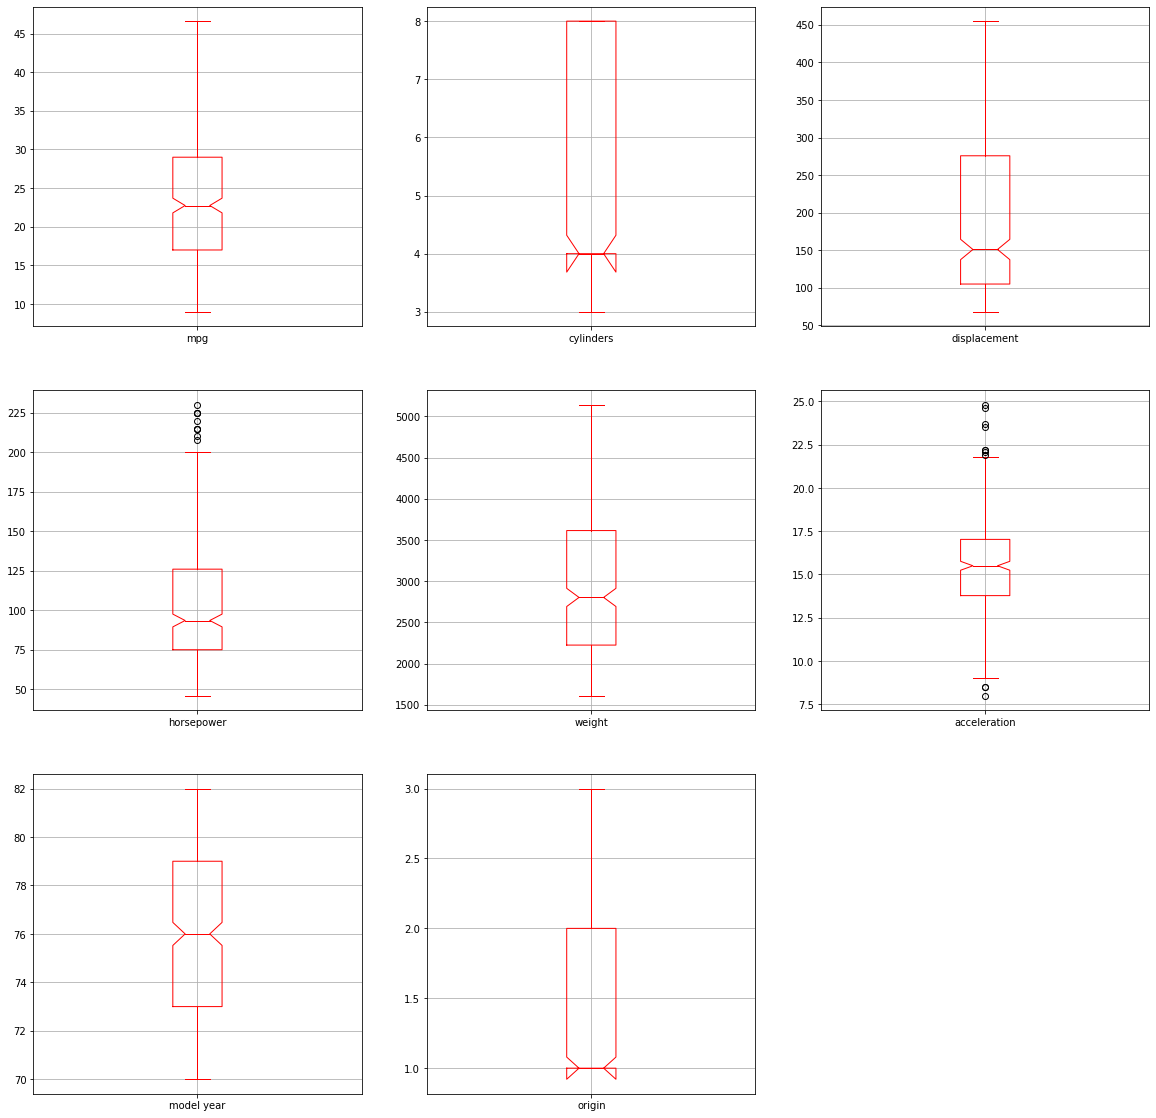

In [15]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(3,3),figsize=(20,20), grid=True, notch=True, color='red',legend=True)

##### Only acceleration and horsepower have outliers...

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014186670748>,
      dtype=object)

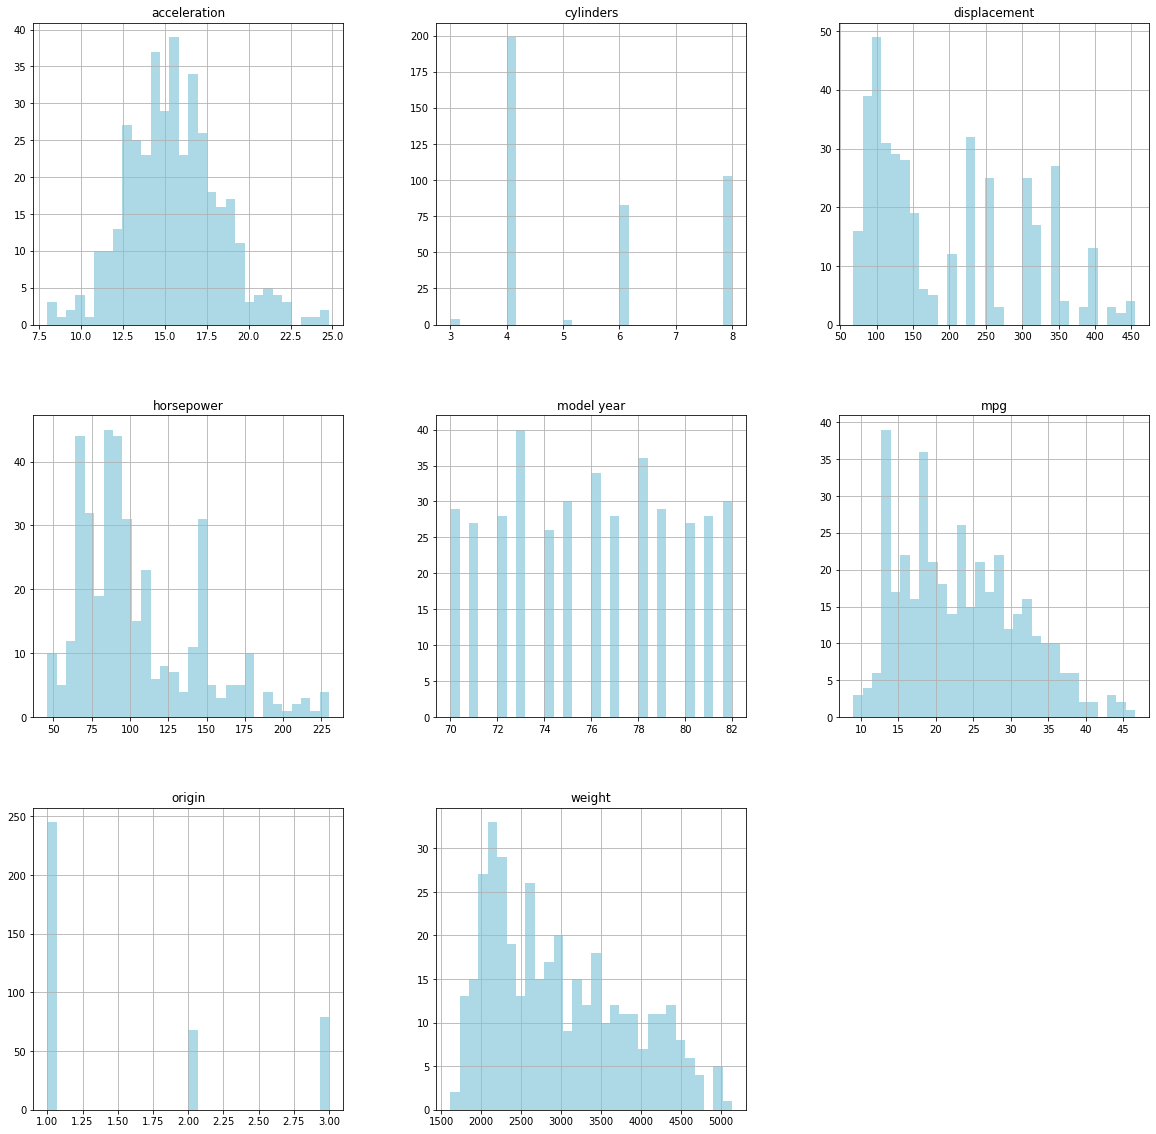

In [16]:
# Checking the Distribution using the histogram plot.
df.hist(figsize=(20,20),grid=True,layout=(3,3),bins=30,color='lightblue') 

##### Some skewness is there, those will be removed after Visualization....

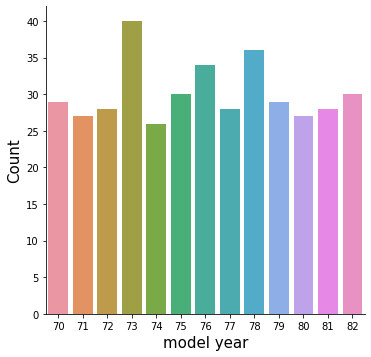

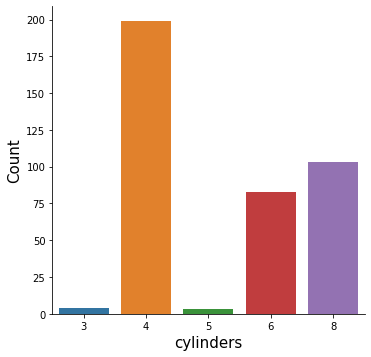

In [17]:
# For loop for Counting number of cylinders and number of cars manufactured in a specific year...
for i in ['model year','cylinders']:
    sns.catplot(x=i,kind='count',data=df,)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Count',fontsize=15)

##### Conclusion:                               
>> Most number of cars are having model year = 73.           
>> Most number of cars are having 4 cylinders.      

## Bivariant Analysis:

In [18]:
# Printing which cylinders give more mpg...
print(df.loc[df['cylinders']==4].max())
print(df.loc[df['cylinders']==5].max())


mpg                         46.6
cylinders                      4
displacement                 156
horsepower                   115
weight                      3270
acceleration                24.8
model year                    82
origin                         3
car name        vw rabbit custom
dtype: object
mpg                           36.4
cylinders                        5
displacement                   183
horsepower                     103
weight                        3530
acceleration                  20.1
model year                      80
origin                           2
car name        mercedes benz 300d
dtype: object


In [19]:
df.loc[df["mpg"]==46.6]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65.0,2110,17.9,80,3,mazda glc


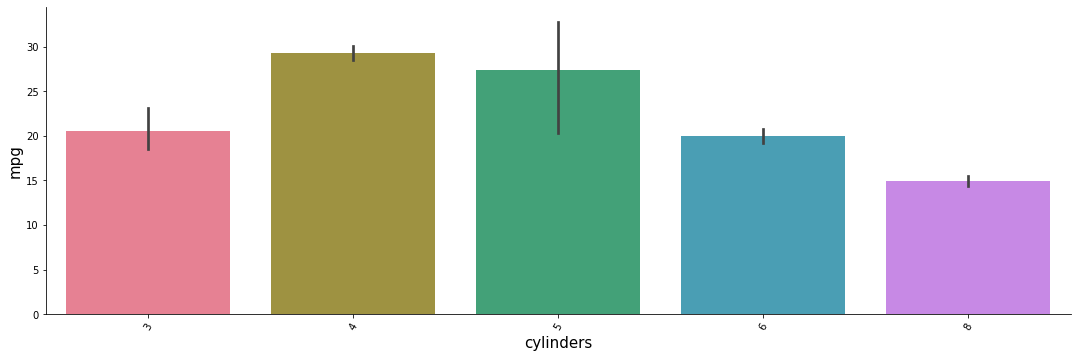

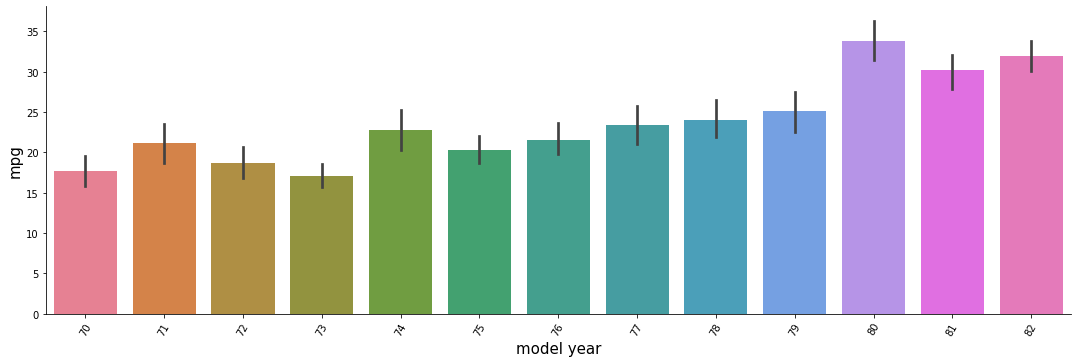

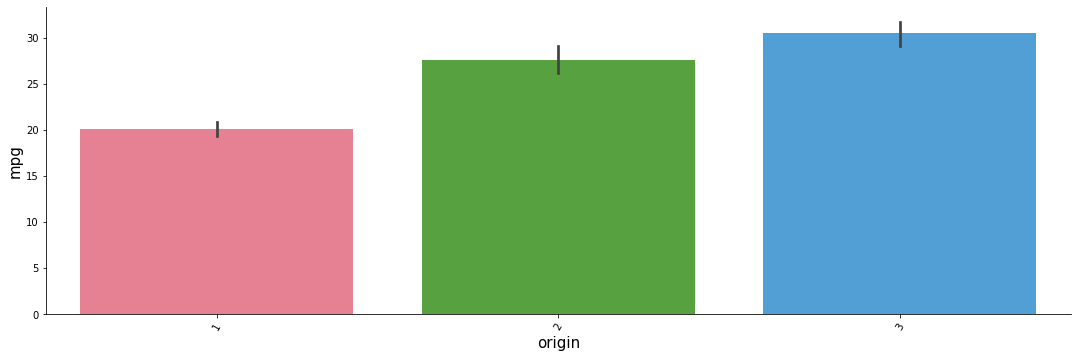

In [20]:
# For Loop for Plotting different Features of the dataset  with respect to the Target Feature.....
for i in ['cylinders','model year','origin']:
    sns.catplot(x=i,y='mpg',data=df,height=5,aspect=3,palette='husl',kind='bar')
    plt.xlabel(i,fontsize=15)
    plt.xticks(rotation=60)
    plt.ylabel('mpg',fontsize=15)

##### Conclusion from above graphs:                       
1) It is clear that we have more miles per gallon if we use 4 cylinder car.                
2) Cars having model year=80 gives more mpg.                
3) Cars of origin category = 3 , gives more mpg.                    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92]),
 <a list of 93 Text xticklabel objects>)

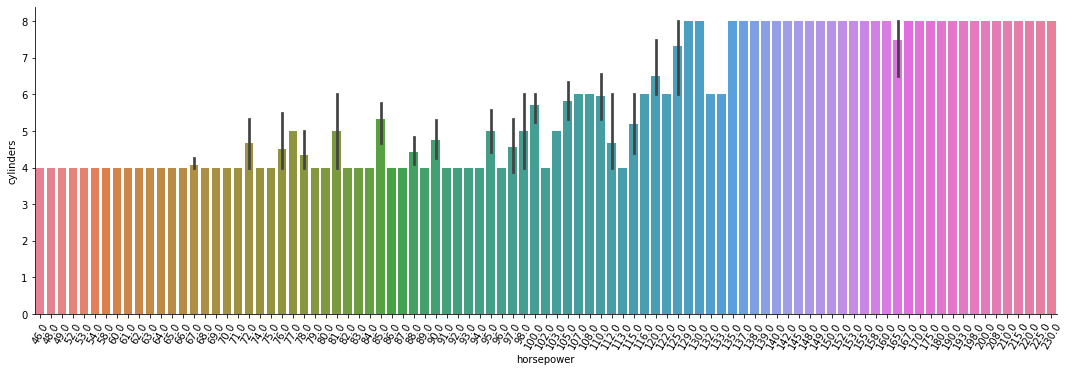

In [21]:
# Graph representing relationship between Horsepower and Cylinders of a car... 
sns.catplot(x='horsepower',y='cylinders',data=df,height=5,aspect=3,palette='husl',kind='bar')
plt.xticks(rotation=60)

##### More the number of cylinders, means more the horsepower.

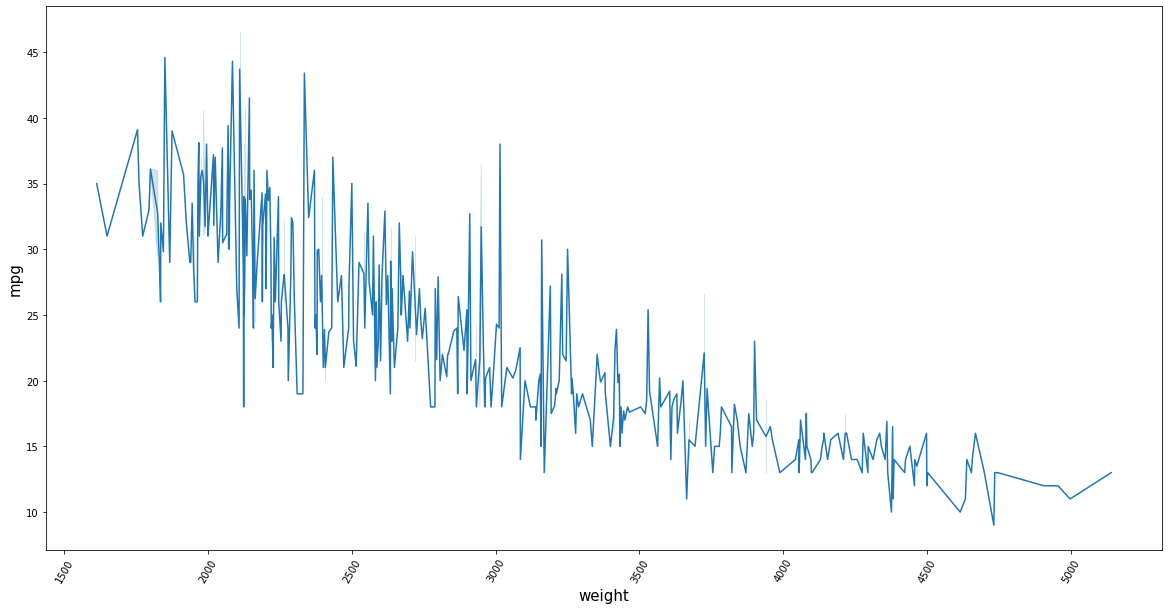

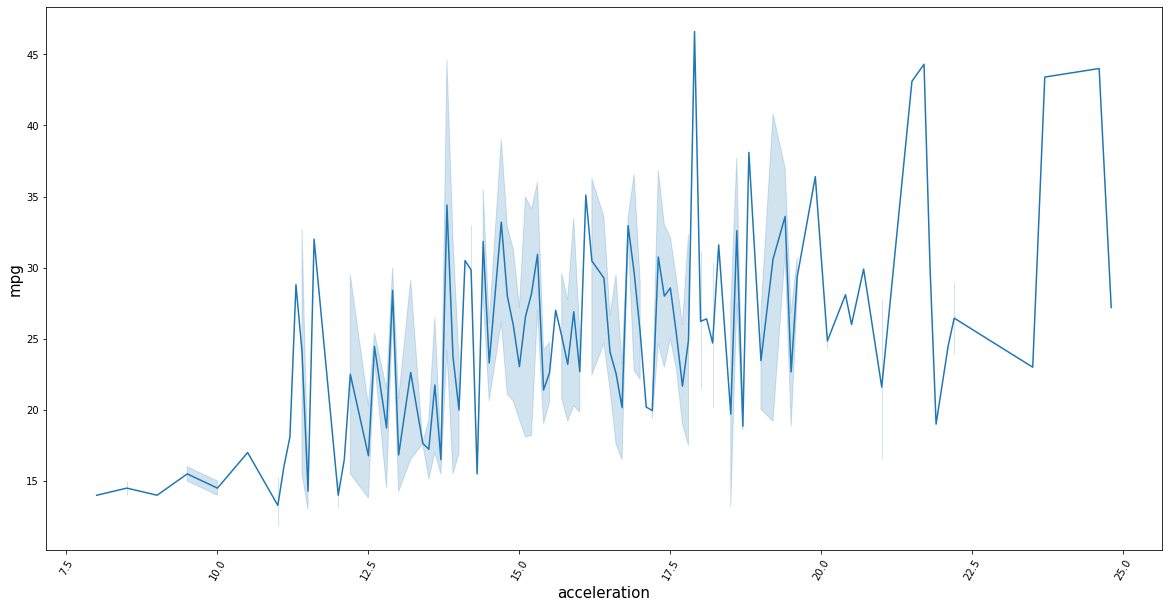

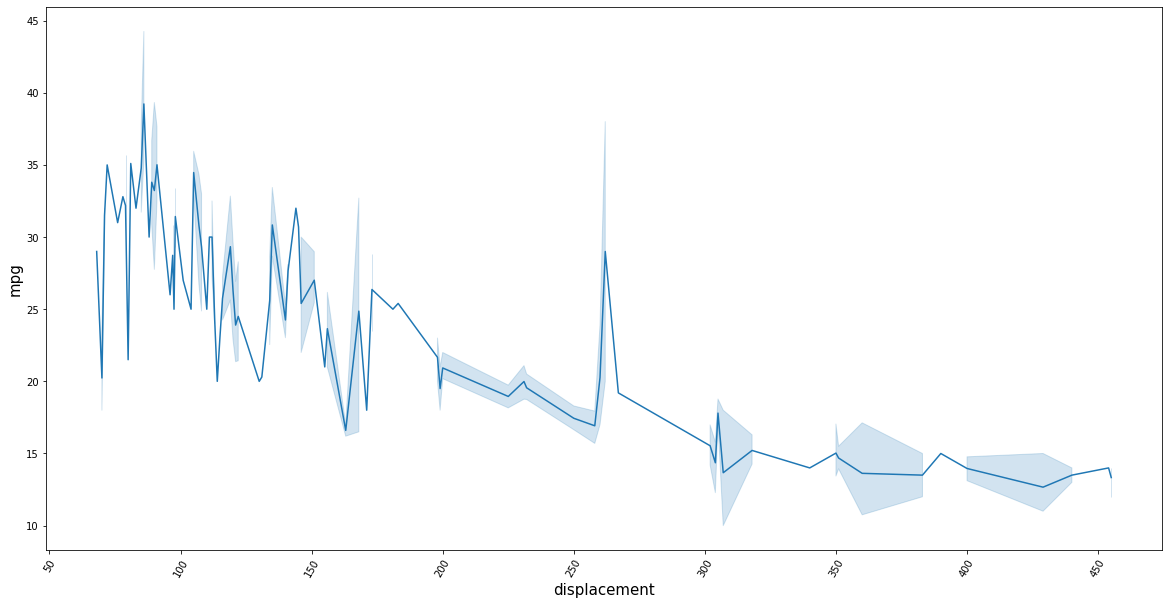

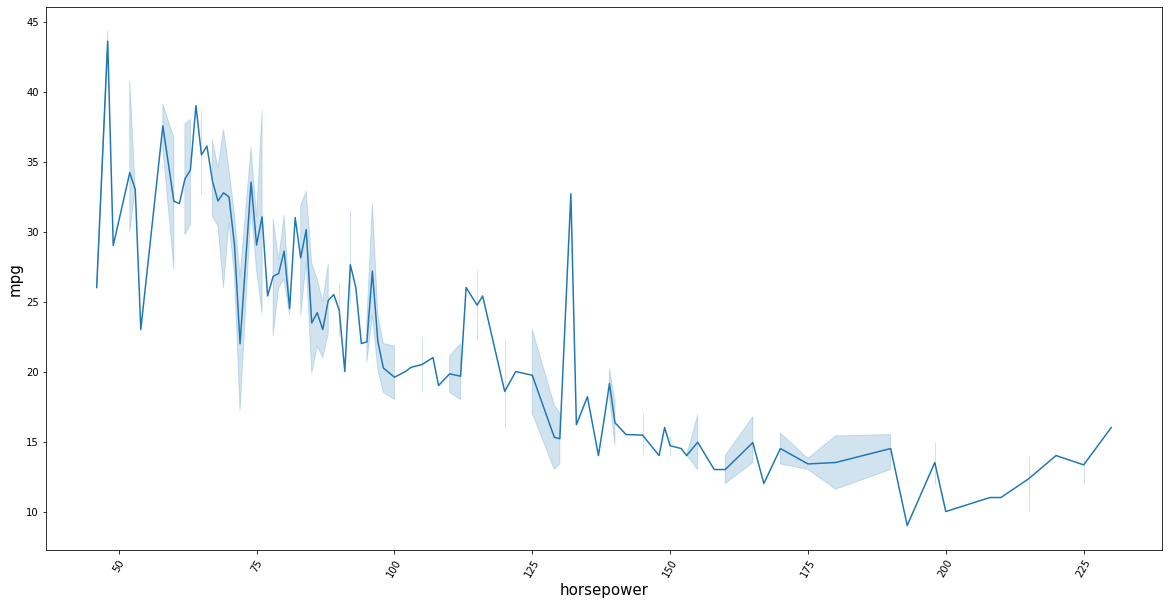

In [22]:
# For loop to plot 
for i in ['weight','acceleration','displacement','horsepower']:
    plt.subplots(figsize=(20,10))
    sns.lineplot(x=i,y='mpg',data=df,palette='husl')
    plt.xlabel(i,fontsize=15)
    plt.xticks(rotation=60)
    plt.ylabel('mpg',fontsize=15)

##### Conclusion:                                                     
1) As weight increases miles pergallon value decreases.                        
2) If acceleration increases then mpg value will increase.                         
3) If displacement increases mpg value decreases.                
4) If Horse power increases then mpg value decreases.                         

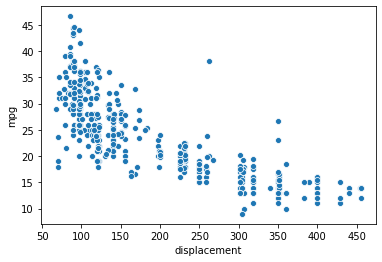

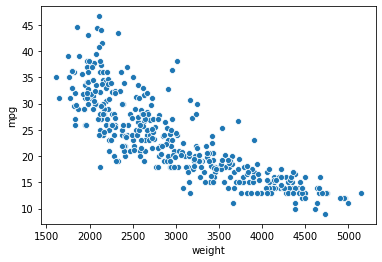

In [23]:
# show scatter plots between displacement, weight and mpg....
for i in ["displacement", "weight"]:
    sns.scatterplot(x=i, y="mpg",data=df)
    plt.show()

##### Conclusion from the scatter plot:                   
1) Displacement and Weight are inversely proportional with mpg.               

Text(0.5, 1.0, 'car name v mpg')

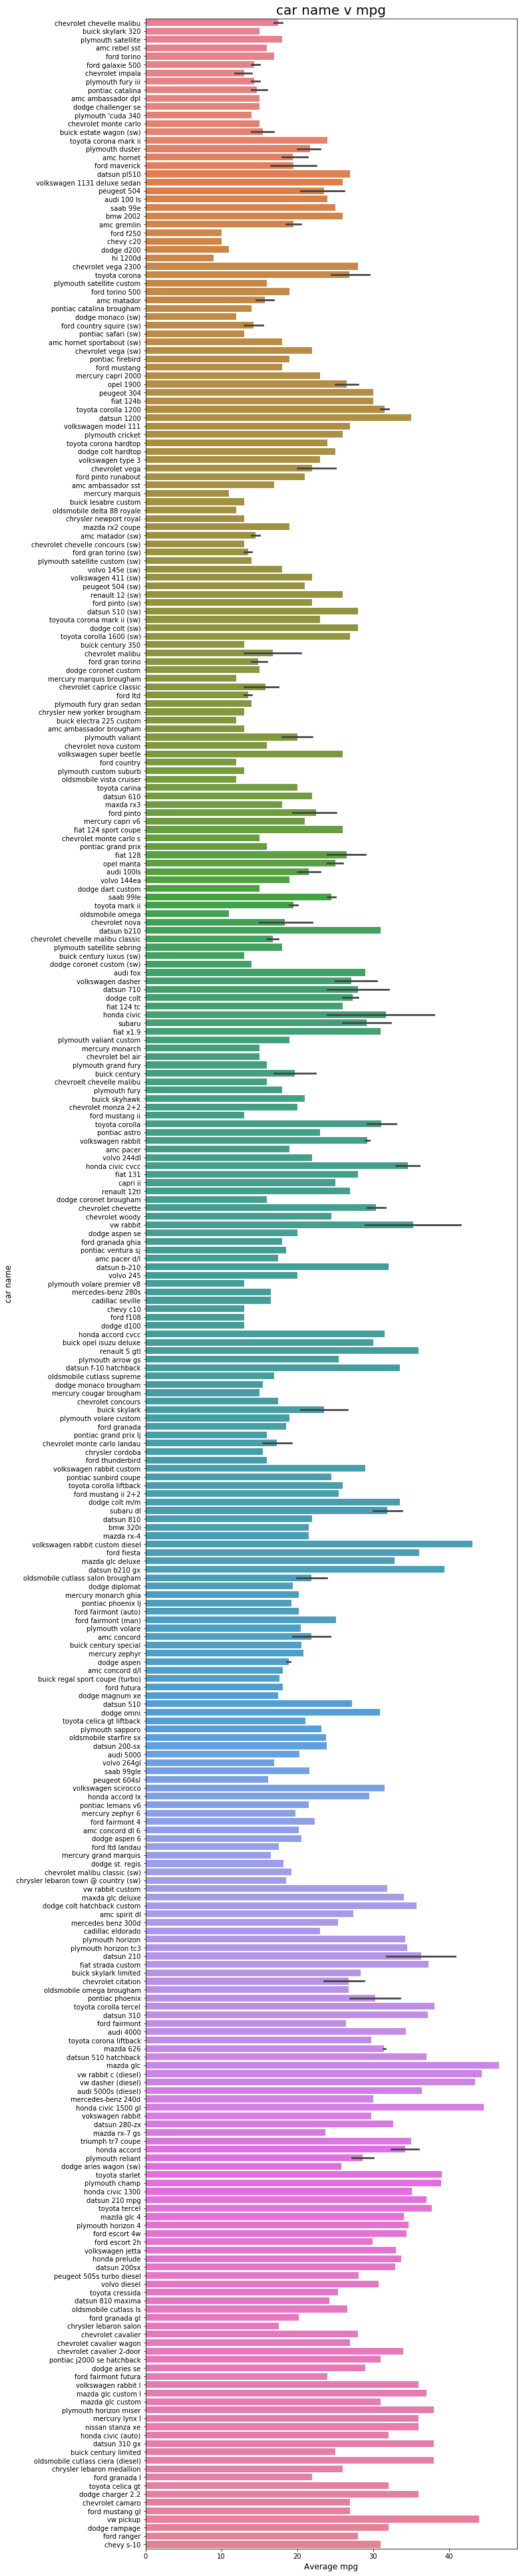

In [24]:
# lets check  which car gives more mpg....
plt.figure(figsize=(10,70))
sns.barplot(x='mpg',y='car name',data=df,palette='husl')
plt.ylabel('car name',{'fontsize' : 'large'})
plt.xlabel('Average mpg',{'fontsize':'large',})
plt.title("car name v mpg",{'fontsize':20})

##### Mazda glc is giving more miles per gallon.

In [25]:
# using Label Encoding to change the value of car name in binary format
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
df['car name']=le.fit_transform(df['car name'])

In [26]:
# Checking Skewness....
df.skew()

mpg             0.457092
cylinders       0.508109
displacement    0.701669
horsepower      1.087326
weight          0.519586
acceleration    0.291587
model year      0.019688
origin          0.915185
car name        0.016312
dtype: float64

In [27]:
# Removing Skewness
for i in df.drop(['mpg'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [28]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(392, 9)
(390, 9)


In [29]:
# Checking Skewness again....
df_new.skew()

mpg             0.444606
cylinders       0.499724
displacement    0.207027
horsepower      0.379944
weight          0.517126
acceleration    0.165320
model year      0.026133
origin          0.800181
car name        0.021474
dtype: float64

In [30]:
# Checking the correlation
df_new.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
mpg,1,-0.78,-0.83,-0.82,-0.83,0.41,0.58,0.57,0.26
cylinders,-0.78,1,0.94,0.84,0.9,-0.51,-0.34,-0.58,-0.27
displacement,-0.83,0.94,1,0.87,0.94,-0.5,-0.33,-0.69,-0.31
horsepower,-0.82,0.84,0.87,1,0.88,-0.7,-0.39,-0.49,-0.26
weight,-0.83,0.9,0.94,0.88,1,-0.42,-0.31,-0.6,-0.25
acceleration,0.41,-0.51,-0.5,-0.7,-0.42,1,0.28,0.22,0.12
model year,0.58,-0.34,-0.33,-0.39,-0.31,0.28,1,0.17,0.067
origin,0.57,-0.58,-0.69,-0.49,-0.6,0.22,0.17,1,0.37
car name,0.26,-0.27,-0.31,-0.26,-0.25,0.12,0.067,0.37,1


(9.0, 0.0)

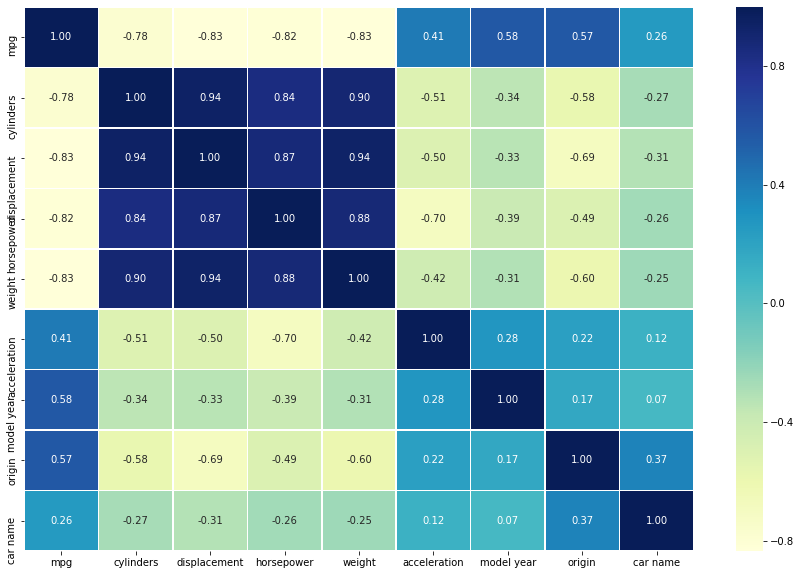

In [31]:
# Plotting Heatmap for Correlation
corr_matrix = df_new.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

##### We can see that there is a relationship between the mpg variable and the other variables and this satisfies the first assumption of Linear regression. There is a strong negative correlation between the displacement,horsepower,weight,and cylinders.This implies that,as any one of those variables increases,the mpg decreases.

In [32]:
# Dropping the target value to fit the remaining data into standard scaler 
x1=df_new.drop(['mpg'],axis=1)
x1
print(x1.shape)

(390, 8)


In [33]:
# Setting up the Target value in variable y.
y=df_new['mpg']
y.shape

(390,)

In [34]:
# scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,1.478570,1.121347,0.809793,0.617878,-1.302413,-1.621860,-0.732388,-1.109139
1,1.478570,1.368221,1.509280,0.840405,-1.488772,-1.621860,-0.732388,-1.256273
2,1.478570,1.187636,1.229510,0.537816,-1.675131,-1.621860,-0.732388,0.939426
3,1.478570,1.102856,1.229510,0.534284,-1.302413,-1.621860,-0.732388,-1.505270
4,1.478570,1.090428,1.027100,0.553122,-1.861491,-1.621860,-0.732388,0.147164
...,...,...,...,...,...,...,...,...
385,-0.867889,-0.212743,-0.266473,-0.034395,0.672996,1.645598,-0.732388,-1.177047
386,-0.867889,-0.354650,-0.399261,-0.222777,0.039374,1.645598,-0.732388,0.056619
387,-0.867889,-0.422854,-0.467962,-0.805584,-1.451500,1.645598,-0.732388,-0.316876
388,-0.867889,-0.643618,-0.647050,-0.417046,1.157530,1.645598,-0.732388,0.124527


## Model Training

In [35]:
#...........Function for GridSearch........
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters):
    clf = GridSearchCV(mod,parameters,scoring='r2' ,cv=5)
    clf.fit(x,y)
    print(clf.best_params_)

In [36]:
#.......Grid Search for SVR......
SV=SVR()
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
parameters={'C': Cs, 'gamma' : gammas}
grid_cv(SV,parameters)

{'C': 10, 'gamma': 0.1}


In [37]:
#........Grid Search for KNeighborsRegressor......
knr=KNeighborsRegressor()
parameters={"n_neighbors":np.arange(1,100)}
grid_cv(knr,parameters)

{'n_neighbors': 4}


In [38]:
#...........Grid Search for Lasso.......
ls=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
grid_cv(ls,parameters)

{'alpha': 0.01}


In [39]:
#..............Grid Search for GradientBoostingRegressor...............
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbr,parameters)

{'learning_rate': 0.1, 'n_estimators': 100}


In [40]:
#.................Grid Search for RandomForestRegressor..........
rf=RandomForestRegressor()
parameters={'n_estimators': [200,500, 700,],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters)

{'max_features': 'auto', 'n_estimators': 500}


In [41]:
#.......Gridsearchcv for Ada Boost Regressor...........
ada=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
grid_cv(ada,parameters,)

{'learning_rate': 0.1, 'n_estimators': 500}


In [53]:
#..............Defining Instances For Differnt Models and fitting best parameters found out from grid search........
KNR=KNeighborsRegressor(n_neighbors=4)
SV=SVR(C=10,gamma=0.1)
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor(max_features='auto',n_estimators=500)
GBR=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
ABR=AdaBoostRegressor(learning_rate=0.1,n_estimators=500)
LS=Lasso(alpha=0.01)
RD=Ridge()
EN=ElasticNet()

In [54]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))

In [55]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_r2_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state

In [56]:
Model=[]
Score=[]
R2_score=[]
cvs=[]
MSE=[]
RMSE=[]
# Create a function to fit and score models
# Make a dictionary to keep model scores
model_r_scores = {}
# Loop through models
# ...............For Loop to Calculate R_2 Score, Cross Val Score and errors.........
for name, model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_r2_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,)
    model.fit(x_train,y_train)
    score=model.score(x_train, y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
#.........Calculating cross_val_score...........
    cv_score=cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
#.......Calculating Mean_square_error..........    
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squared Error : ',mse )
    MSE.append(mse*100)
    print('\n')
#.......Calculating.....Root_Mean_square_error.........   
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error : ',rmse )
    RMSE.append(rmse*100)
    print('\n')

*************************** KNeighborsRegressor *****************************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')


max r2 score corresponding to 80 is: 0.918653915582408
Learning Score :  0.9107731977887549
R2 Score :  0.918653915582408


Cross Val Score :  0.7147886716189116


Mean Squared Error :  5.0529807692307696


Root Mean Squared Error :  2.247883620037027


*************************** SVR *****************************


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


max r2 score corresponding to 87 is: 0.9259843078481809
Learning Score :  0.9055549812468024
R2 Score :  0.9259843078481809


Cross Val Score :  0.7564596125251446


Mean Squared Error :  3.4904565607365727


Root Mean Squared Error :  1.8682763609103907


*************

In [57]:
#............. DataFrame to show all the calculated scores in one table........
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'R2_score':R2_score,'Cross_Val_Score':cvs,
                     'Mean_squared_error':MSE,'Root_Mean_squared_error':RMSE})  
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,R2_score,Cross_Val_Score,Mean_squared_error,Root_Mean_squared_error
0,KNeighborsRegressor,91.0773,91.8654,71.4789,505.298,224.788
1,SVR,90.5555,92.5984,75.646,349.046,186.828
2,LinearRegression,82.6831,88.1406,66.1383,559.269,236.489
3,DecisionTreeRegressor,100,86.584,62.4281,968.808,311.257
4,RandomForestRegressor,97.9933,92.9002,77.7637,406.038,201.504
5,GradientBoostingRegressor,97.0713,94.7579,75.6838,299.794,173.146
6,AdaBoostRegressor,89.7204,90.6926,71.9495,438.921,209.504
7,Lasso,82.6752,88.2936,66.2155,552.055,234.958
8,Ridge,82.6798,88.2927,66.2961,552.096,234.967
9,ElasticNet,76.8285,86.8283,58.5408,621.154,249.23


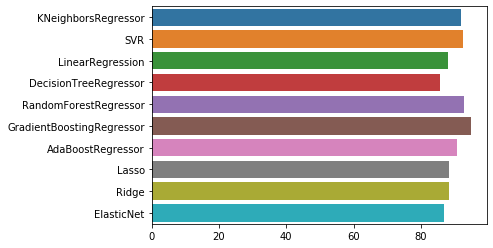

In [47]:
# ..........visualisation of Accuracy Score using Bar Plot..........
sns.barplot(y=Model,x=R2_score)

## After all this process conclusion is that GradientBoostingRegressor is performing better than rest and along with r2_score it's error is better among all...

In [48]:
# Using GradientBoostingRegressor for final model...
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=.20,)
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
gbrpred=gbr.predict(x_test)
print('R2 Score : ',r2_score(y_test,gbrpred))
print('Mean Squarred Error : ',mean_squared_error(y_test,gbrpred))
print('Root Mean Squarred Error : ',np.sqrt(mean_squared_error(y_test,gbrpred))) 

R2 Score :  0.9479631946251456
Mean Squarred Error :  2.9759794254307543
Root Mean Squarred Error :  1.725102728950005


In [49]:
# Printing predicted values
test=pd.DataFrame(data=y_test)
test['Predicted values']=gbrpred
test

,mpg,Predicted values
108,20.0,23.054712
219,25.5,26.339292
255,25.1,23.965924
150,26.0,24.313289
35,17.0,17.715320
...,...,...
89,15.0,13.914969
116,16.0,13.663299
8,14.0,13.188036
62,13.0,13.734376


In [50]:
# Saving the Predicted values in csv file
test.to_csv('Project_15_Auto_Mpg.csv',index=False)   

In [51]:
# Dumping Data in pickle file.
from sklearn.externals import joblib
joblib.dump(gbr,'Project_15_Auto_Mpg.pkl')

['Project_15_Auto_Mpg.pkl']

In [52]:
# Loading predicted values.
final=joblib.load('Project_15_Auto_Mpg.pkl')
final.predict(x_test)

array([23.05471231, 26.33929205, 23.96592436, 24.31328916, 17.71532037,
       27.194515  , 34.27743457, 28.96493839, 12.24014116, 30.86969186,
       18.06822389, 20.3132882 , 31.00621145, 26.74840925, 29.5056471 ,
       34.00154228, 13.9292236 , 30.9408036 , 22.21258025, 15.56282983,
       34.46341372, 15.65487513, 38.20377038, 17.41242522, 13.76633781,
       24.98927933, 16.87085546, 20.49512089, 35.70146992, 22.97941599,
       21.0263857 , 23.01649305, 30.54981786, 36.27015864, 15.0384502 ,
       13.31725864, 15.66476463, 23.18431462, 26.33987577, 12.85587207,
       35.85165309, 22.64869099, 18.8673471 , 17.08664416, 13.13998252,
       28.72699086, 41.71203247, 25.93916828, 18.10328308, 35.89420167,
       14.66066597, 20.38920258, 28.75504177, 18.0584742 , 17.06980458,
       13.79859355, 26.49841157, 34.38072831, 21.00648105, 12.86703146,
       26.82472742, 32.30271178, 21.70942411, 15.35805951, 13.8941518 ,
       17.20846032, 21.32687379, 14.53456639, 19.34898475, 13.79

## Conclusion:              
1) Most number of cars are having model year = 73.               
2) Most number of cars are having 4 cylinders.                       
3) It is clear that we have more miles per gallon if we use 4 cylinder car.              
4) Cars having model year=80 gives more mpg.                      
5) Cars of origin category = 3 , gives more mpg.                  
6) More the number of cylinders, means more the horsepower.              
7) As weight increases miles pergallon value decreases.               
8) If acceleration increases then mpg value will increase.               
9) If displacement increases mpg value decreases.                
10) If Horse power increases then mpg value decreases.                
11) Displacement and Weight are inversely proportional with mpg.  
12) Mazda glc is giving more miles per gallon.       

## Steps Followed:               
1) Understanding Data.                   
2) EDA Analysis.                        
3) Best parameters are found using Gridsearch cv and applied to models.                    
4) Best parameters are applied to each models and machine is trained for each models to find Best R2 Score, Cross val score, mean squared error and root mean square error.                                    
5) A Result table is made comprises of r2, cross_val score, mean squared error and root mean square error of each model.      
6) GradientBoostingRegressor is used to train the model finally as it's r2_score is best and error is less among the rest of the models.               
7) Predicted values are saved in Project_15_Auto_Mpg.csv file.               
8) Pickle file is named with Project_15_Auto_Mpg.pkl file          